In [1]:
# Importing necessary libraries for data handling and visualization
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting charts
import seaborn as sns  # for advanced data visualization

# Loading the dataset
# The dataset is expected to be in the same directory as this notebook
# It contains credit card transactions labeled as fraudulent or non-fraudulent
df = pd.read_csv("creditcard.csv")

# Displaying the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Viewing the first few rows to understand the structure of the dataset
df.head()

Shape of the dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Getting basic information about the dataset such as data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Checking for missing values to assess data quality
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

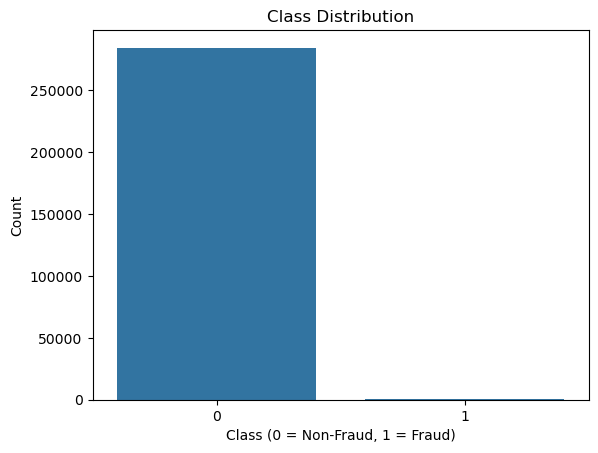

In [13]:
# Checking class distribution to identify class imbalance
# This helps to understand how many fraudulent transactions exist compared to non-fraudulent
sns.countplot(x="Class", data=df)
plt.title("Class Distribution")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

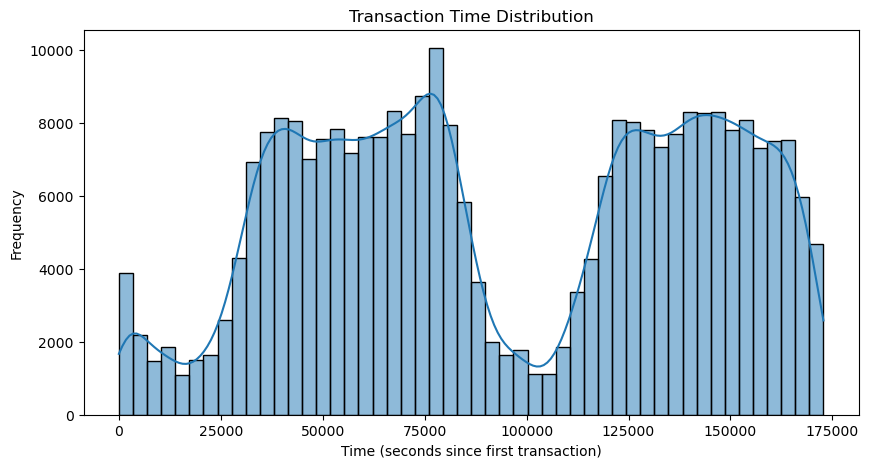

In [15]:
# Plotting the distribution of transaction times to identify any temporal patterns
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

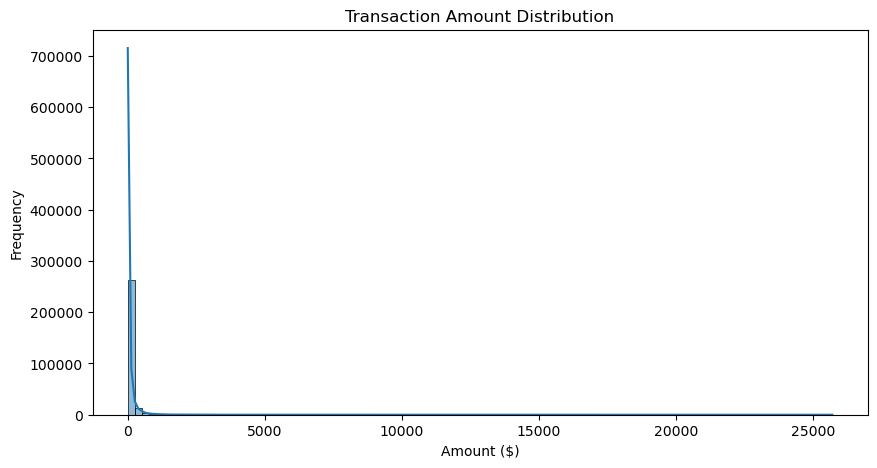

In [17]:
# Plotting the distribution of transaction amounts to observe spending behavior
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.show()

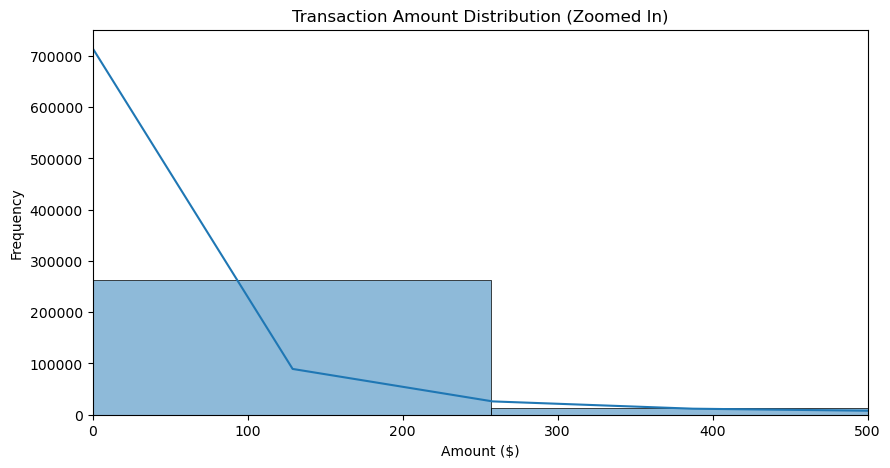

In [19]:
# Zooming into the amount range 0–500 for better visualization of common transaction values
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution (Zoomed In)")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.show()

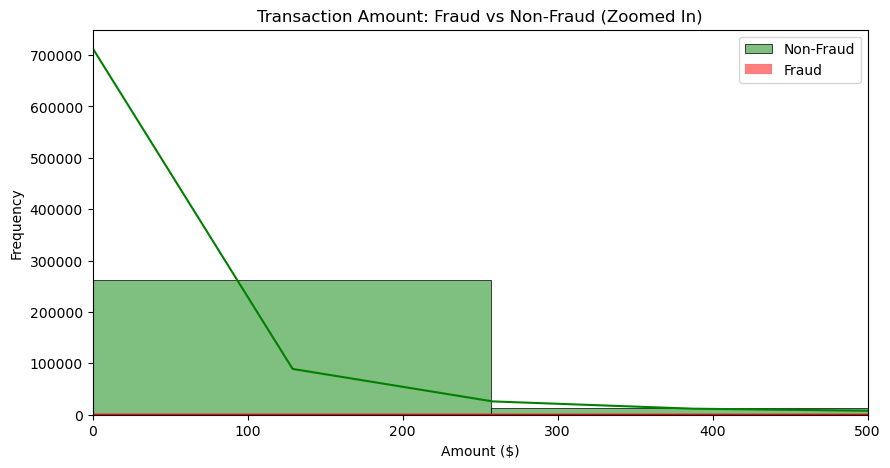

In [21]:
# Comparing amount distributions for fraud vs non-fraud transactions
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Amount: Fraud vs Non-Fraud (Zoomed In)")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 500)
plt.show()

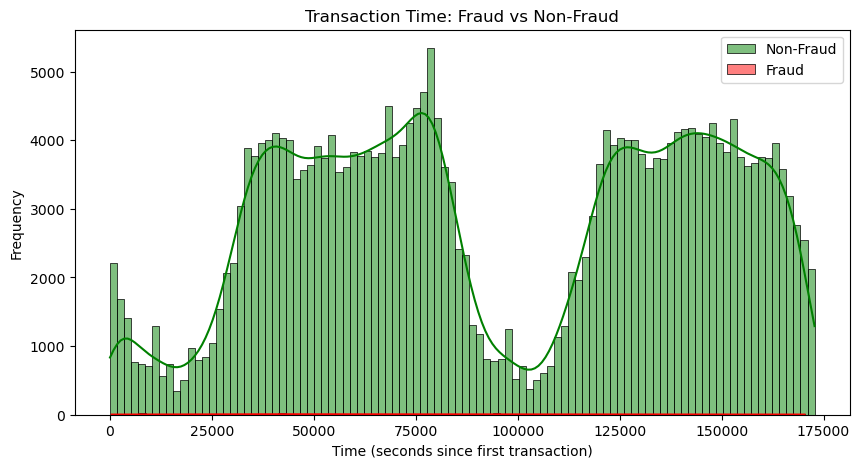

In [23]:
# Comparing transaction time distributions for fraud vs non-fraud transactions
plt.figure(figsize=(10,5))
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, color='green', label='Non-Fraud', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', kde=True)
plt.legend()
plt.title("Transaction Time: Fraud vs Non-Fraud")
plt.xlabel("Time (seconds since first transaction)")
plt.ylabel("Frequency")
plt.show()

In [25]:
# Importing StandardScaler to normalize 'Amount' and 'Time' columns
from sklearn.preprocessing import StandardScaler

# Creating a copy of the dataset to apply transformations
df_scaled = df.copy()

# Applying standard scaling to 'Amount' and 'Time' features
df_scaled[['Amount', 'Time']] = StandardScaler().fit_transform(df[['Amount', 'Time']])

# Separating features and target label for modeling
X = df_scaled.drop('Class', axis=1)  # Features (input variables)
y = df_scaled['Class']  # Target (0 = Non-Fraud, 1 = Fraud)

# Importing SMOTE to balance the dataset by oversampling minority class
from imblearn.over_sampling import SMOTE

# Applying SMOTE to generate synthetic fraud samples and balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Printing class distribution before and after SMOTE
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(y_resampled.value_counts())

Before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64

After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [29]:
# Importing LogisticRegression model and train_test_split function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initializing the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Fitting the model to the training data
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

In [33]:
# Importing evaluation metrics: confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Generating and printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generating and printing classification report to evaluate precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[83058  2091]
 [ 6687 78753]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



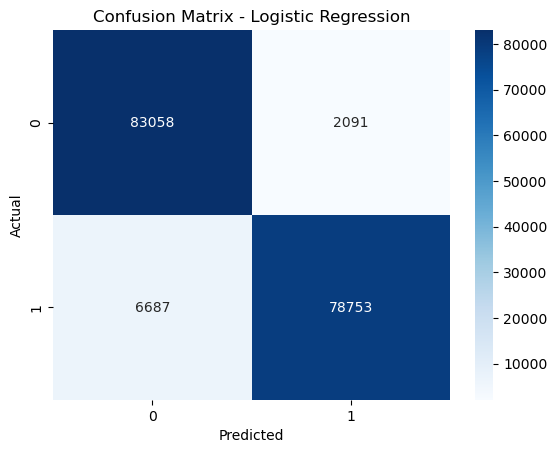

In [35]:
# Visualizing the confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()